# Activity 2: Lévy distribution - N different curves

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from scipy.stats import cauchy
from scipy.stats import levy
#from plotly
import plotly.graph_objects as go

## Vec2d Class

In [101]:
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    def __mul__(self, scalar):
        if isinstance(scalar, (int, float)):
            return Vec2d(self.x * scalar, self.y * scalar)
        else:
            raise TypeError("Scalar multiplication only supports int or float")

    def __rmul__(self, scalar):
        return self * scalar
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Plot at least the 4 different curves shown in the figure using plotly.
## Each one of the curves corresponds to a different alpha value.

In [11]:
# Define parameters
alphas = [0.1, 0.5, 1.0, 1.9]
beta = 0  # Symmetry parameter for Lévy distribution (0 for symmetric)
m = np.linspace(-2, 8, 1000)  # Range of x values
# Create the plot
fig = go.Figure()
for alpha in alphas:
    # Generate the PDF for the Lévy distribution with the given alpha
    pdf = levy_stable.pdf(m, alpha, beta)
    fig.add_trace(go.Scatter(x=m, y=pdf, mode='lines', name=f'Levy_{alpha}'))
# Update layout
fig.update_layout(
    title="Lévy Distributions with Different Alpha Values",
    xaxis_title="m",
    yaxis_title="Probability Density",
    template="plotly_dark"
)
# Show the plot
fig.show()

## Consider the following parameters: m = 3.0, beta = 0.

In [14]:
# Define parameters
alphas = [0.1, 0.5, 1.0, 1.9]  # Different alpha values
m = 3.0  # Location parameter
beta = 0  # Symmetry parameter for Lévy distribution (0 for symmetric)
x = np.linspace(-2, 8, 1000)  # Range of x values
# Create the plot
fig = go.Figure()
for alpha in alphas:
    # Generate the PDF for the Lévy distribution with the given alpha
    pdf = levy_stable.pdf(x, alpha, beta, loc=m)
    fig.add_trace(go.Scatter(x=x, y=pdf, mode='lines', name=f'Levy_{alpha}'))
# Update layout
fig.update_layout(
    title=f'Lévy Distributions with Different Alpha Values (m={m}, beta={beta})',
    xaxis_title="x",
    yaxis_title="Probability Density",
    template="plotly_dark"
)
# Show the plot
fig.show()

# Activity 3: Lévy distribution - Histograma + Curve

## From a set of random values drawn from a Lévy stable distribution, obtain its histogram and compare it to the corresponding PDF curve.
## Visualize using matplotlib.

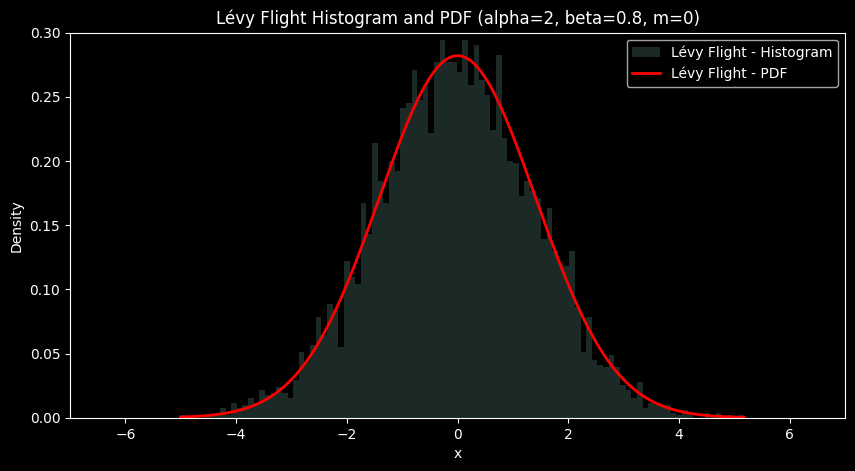

In [93]:
# Parameters
alpha = 2  # Stability parameter (0 < alpha <= 2)
beta = 0.8  # Symmetry parameter (-1 <= beta <= 1)
m = 0  # Location parameter (mean of the distribution)
sample_size = 5000  # Number of samples to generate
# Generate random values from the Lévy stable distribution
r = levy_stable.rvs(alpha, beta, loc=m, size=sample_size)
# Define x range for the PDF curve (matching the range of the histogram)
x = np.linspace(min(r), max(r), 1000)
# Calculate the PDF for the Lévy stable distribution
pdf = levy_stable.pdf(x, alpha, beta, loc=m)
# Create the plot
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)
# Plot the histogram of the Lévy flight
ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Lévy Flight - Histogram')
# Overlay the PDF on the histogram
ax.plot(x, pdf, 'r-', lw=2, label='Lévy Flight - PDF')
# Set the same x and y axis limits as in your example
ax.set_xlim(-7, 7)
ax.set_ylim(0, 0.3)
# Add titles and labels
ax.set_title(f"Lévy Flight Histogram and PDF (alpha={alpha}, beta={beta}, m={m})")
ax.set_xlabel('x')
ax.set_ylabel('Density')
# Add a legend
ax.legend()
# Show the plot
plt.show()

# Activity 4: Lévy flight - Vec2d - 1 Trajecotry

## Generate a Lévy flight trajectory.

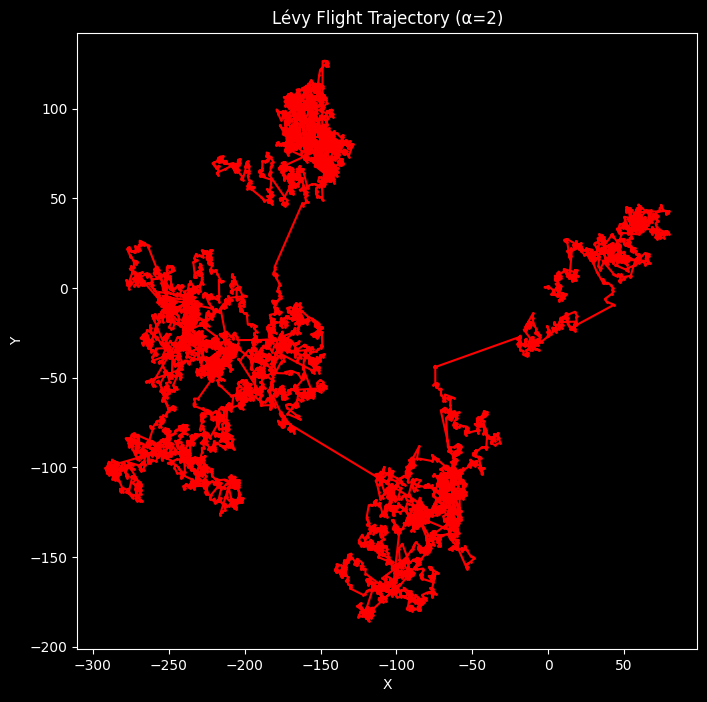

In [66]:
def levy_flight(num_steps, alpha):
    # Generate step sizes from a power-law distribution
    step_sizes = (np.random.pareto(alpha, num_steps) + 1)
    # Generate angles
    angles = np.random.uniform(0, 2 * np.pi, num_steps)
    # Initialize position
    x, y = np.zeros(num_steps), np.zeros(num_steps)
    # Update positions based on step sizes and angles
    for i in range(1, num_steps):
        x[i] = x[i-1] + step_sizes[i] * np.cos(angles[i])
        y[i] = y[i-1] + step_sizes[i] * np.sin(angles[i])
    return x, y
# Parameters
num_steps = 10000
alpha = 2
# Generate and plot Lévy flight
x, y = levy_flight(num_steps, alpha)
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', color='red', markersize=1)
plt.title(f'Lévy Flight Trajectory (α={alpha})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Implement usign Vec2d class.

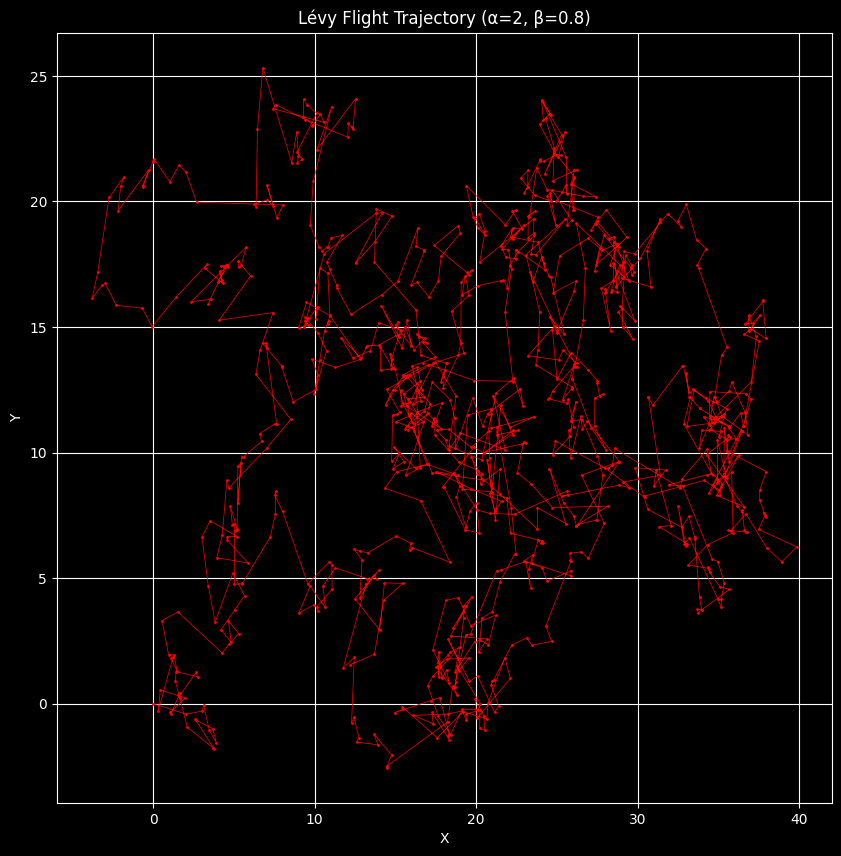

In [102]:
def levy_flight(num_steps, alpha, beta):
    # Generate step sizes from a Lévy stable distribution
    step_sizes = levy_stable.rvs(alpha, beta, size=num_steps)
    # Generate angles
    angles = np.random.uniform(0, 2 * np.pi, num_steps)
    # Initialize position
    position = Vec2d(0, 0)
    # Initialize lists to store trajectory
    x, y = [position.x], [position.y]
    # Update positions based on step sizes and angles
    for i in range(num_steps):
        direction = Vec2d(1, 0).rotated(angles[i])
        step = direction * step_sizes[i]
        position += step
        x.append(position.x)
        y.append(position.y)
    return x, y
# Parameters
alpha = 2
beta = 0.8
num_steps = 1000
# Generate Lévy flight trajectory
x_vals, y_vals = levy_flight(num_steps, alpha, beta)
# Plot the Lévy flight trajectory
plt.figure(figsize=(10, 10))
plt.plot(x_vals, y_vals, marker='o', markersize=1, color='red', linestyle='-', linewidth=0.5)
plt.title(f'Lévy Flight Trajectory (α={alpha}, β={beta})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## Keep the trajectory in a pandas Data Frame.

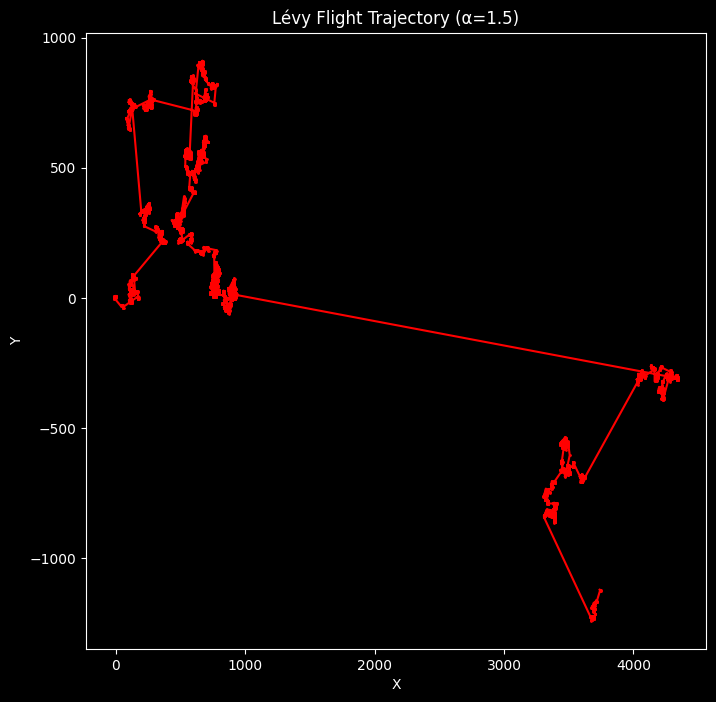

   Step         X         Y
0     0  0.000000  0.000000
1     1 -0.020445  2.015722
2     2 -1.339537  3.203523
3     3 -2.388617  3.675774
4     4  0.789550  6.937493


In [67]:
def levy_flight(num_steps, alpha):
    # Generate step sizes from a power-law distribution
    step_sizes = (np.random.pareto(alpha, num_steps) + 1)
    # Generate angles
    angles = np.random.uniform(0, 2 * np.pi, num_steps)
    # Initialize position
    x, y = np.zeros(num_steps), np.zeros(num_steps)
    # Update positions based on step sizes and angles
    for i in range(1, num_steps):
        x[i] = x[i-1] + step_sizes[i] * np.cos(angles[i])
        y[i] = y[i-1] + step_sizes[i] * np.sin(angles[i])
    # Create a DataFrame to store the trajectory
    df = pd.DataFrame({
        'Step': np.arange(num_steps),
        'X': x,
        'Y': y
    })
    return df
# Parameters
num_steps = 10000
alpha = 1.5
# Generate Lévy flight and store it in a DataFrame
df_levy_flight = levy_flight(num_steps, alpha)
# Plot the Lévy flight trajectory
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.plot(df_levy_flight['X'], df_levy_flight['Y'], color='red', marker='o', markersize=1)
plt.title(f'Lévy Flight Trajectory (α={alpha})')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# Display the first few rows of the DataFrame
print(df_levy_flight.head())

## Visualize trajectory using plotly - 3D projection

In [69]:
def levy_flight(num_steps, alpha):
    # Generate step sizes from a power-law distribution
    step_sizes = (np.random.pareto(alpha, num_steps) + 1)
    # Generate angles
    angles = np.random.uniform(0, 2 * np.pi, num_steps)
    # Initialize position
    x, y = np.zeros(num_steps), np.zeros(num_steps)
    # Update positions based on step sizes and angles
    for i in range(1, num_steps):
        x[i] = x[i-1] + step_sizes[i] * np.cos(angles[i])
        y[i] = y[i-1] + step_sizes[i] * np.sin(angles[i])
    # Create a DataFrame to store the trajectory
    df = pd.DataFrame({
        'Step': np.arange(num_steps),
        'X': x,
        'Y': y
    })
    return df
# Parameters
num_steps = 10000
alpha = 2
# Generate Lévy flight and store it in a DataFrame
df_levy_flight = levy_flight(num_steps, alpha)
# Create a 3D scatter plot using Plotly
fig = go.Figure()
# Add trace for the Lévy flight trajectory
fig.add_trace(go.Scatter3d(
    x=df_levy_flight['X'],
    y=df_levy_flight['Y'],
    z=df_levy_flight['Step'],  # Using 'Step' as the Z axis for better visualization
    mode='lines+markers',
    marker=dict(size=2),
    line=dict(width=1, color='red')
))
# Update layout for better visualization
fig.update_layout(
    title=f'Lévy Flight Trajectory (α={alpha})',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Step'
    ),
    autosize=False,
    width=800,
    height=800,
    template="plotly_dark"
)
# Show the plot
fig.show()